<a href="https://colab.research.google.com/github/Sucerquia/machine-learning/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


#get the training set and the test set
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [2]:
#import the data base from the github repository
url = "https://raw.githubusercontent.com/Sucerquia/machine-learning/master/Incidentes_georreferenciados_2019.csv"
info = pd.read_csv(url)

#we show the data complete
info.head()

,OBJECTID,RADICADO,HORA,DIA,PERIODO,CLASE,DIRECCION_ENC,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD
0,790144,1717722,01:35:00,1,2020,Choque,CL 010 A 041 000 00000,Malla vial,CON HERIDOS,El Poblado,El Poblado,Tramo de via,MIÉRCOLES,7,JULIO,834977.94,1178769.85,-75.568507,6.210703
1,790145,1714151,11:30:00,8,2020,Choque,CR 038 049 A 000 00000,Malla vial,SOLO DAÑOS,Boston,La Candelaria,Tramo de via,VIERNES,5,MAYO,836034.83,1182513.26,-75.558959,6.244545
2,790146,1727015,08:25:00,19,2020,Otro,CR 057 051 000 00000,Malla vial,SOLO DAÑOS,San Benito,La Candelaria,Tramo de via,LUNES,10,OCTUBRE,834254.74,1183457.46,-75.575041,6.253081
3,790147,1718974,06:30:00,15,2020,Choque,CL 005 047 000 00000,No Ubicada,CON HERIDOS,Sin Inf,Sin Inf,Interseccion,MIÉRCOLES,7,JULIO,820000.00,1180000.00,-75.703816,6.221806
4,790148,1712988,02:00:00,5,2020,Choque,CR 062 050 000 00000,Malla vial,CON HERIDOS,San Benito,La Candelaria,Tramo de via,DOMINGO,4,ABRIL,834101.73,1183542.28,-75.576423,6.253848


Es claro que hay datos que no son relevantes como el número del radicado o el tipo de geolocalización, por esa razón, es necesario hacer una limpieza de la base de datos en la que sólo queden los datos relevantes, como sigue

In [3]:
clean = ["CLASE", "OBJECTID",	"RADICADO",	"PERIODO", "DIRECCION_ENC", "TIPO_GEOCOD", "DISENO", "X_MAGNAMED", "Y_MAGNAMED", "BARRIO", "COMUNA", "MES_NOMBRE"]
for char in clean:
  info = info.drop(char, axis = 1)
info.head()

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,01:35:00,1,CON HERIDOS,MIÉRCOLES,7,-75.568507,6.210703
1,11:30:00,8,SOLO DAÑOS,VIERNES,5,-75.558959,6.244545
2,08:25:00,19,SOLO DAÑOS,LUNES,10,-75.575041,6.253081
3,06:30:00,15,CON HERIDOS,MIÉRCOLES,7,-75.703816,6.221806
4,02:00:00,5,CON HERIDOS,DOMINGO,4,-75.576423,6.253848


Otro factor imporante es considerar que, dado que nuestro proceso de aprendizaje en las redes neuronales se da para números y no para caracteres, se hace necesario cambiar por ejemplo cambiar las caracteristicas por cantidades numéricas.

In [4]:
for x in range(len(info["GRAVEDAD"])):
  if info["GRAVEDAD"][x] == 'SOLO DAÑOS':
    info["GRAVEDAD"][x] = 'ASOLO DAÑOS'
  if info["GRAVEDAD"][x] == 'CON HERIDOS':
    info["GRAVEDAD"][x] = 'BCON HERIDOS'
  if info["GRAVEDAD"][x] == 'CON MUERTOS':
    info["GRAVEDAD"][x] = 'CCON MUERTOS'
#We change the cualitative values by numbers
encoder = LabelEncoder()
encoder.classes_ = ['SOLO DAÑOS', 'CON HERIDOS', 'CON MUERTOS']
info["GRAVEDAD"] = encoder.fit_transform(info["GRAVEDAD"])
print(encoder.classes_)
info.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


['ASOLO DAÑOS' 'BCON HERIDOS' 'CCON MUERTOS']


,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,01:35:00,1,1,MIÉRCOLES,7,-75.568507,6.210703
1,11:30:00,8,0,VIERNES,5,-75.558959,6.244545
2,08:25:00,19,0,LUNES,10,-75.575041,6.253081
3,06:30:00,15,1,MIÉRCOLES,7,-75.703816,6.221806
4,02:00:00,5,1,DOMINGO,4,-75.576423,6.253848


In [5]:
for x in range(len(info["DIA_NOMBRE"])):
  if info["DIA_NOMBRE"][x] == 'LUNES    ':
    info["DIA_NOMBRE"][x] = 'ALUNES'
  if info["DIA_NOMBRE"][x] == 'MARTES   ':
    info["DIA_NOMBRE"][x] = 'BMARTES'
  if info["DIA_NOMBRE"][x] == 'MIÉRCOLES':
    info["DIA_NOMBRE"][x] = 'CMIÉRCOLES'
  if info["DIA_NOMBRE"][x] == 'JUEVES   ':
    info["DIA_NOMBRE"][x] = 'DJUEVES'
  if info["DIA_NOMBRE"][x] == 'VIERNES  ':
    info["DIA_NOMBRE"][x] = 'EVIERNES'
  if info["DIA_NOMBRE"][x] == 'SÁBADO   ':
    info["DIA_NOMBRE"][x] = 'FSABADO'
  if info["DIA_NOMBRE"][x] == 'DOMINGO  ':
    info["DIA_NOMBRE"][x] = 'GDOMINGO'
#We change the cualitative values by numbers
encoder2 = LabelEncoder()
info["DIA_NOMBRE"] = encoder2.fit_transform(info["DIA_NOMBRE"])
print(encoder2.classes_)
info.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packa

['ALUNES' 'BMARTES' 'CMIÉRCOLES' 'DJUEVES' 'EVIERNES' 'FSABADO' 'GDOMINGO']


,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,01:35:00,1,1,2,7,-75.568507,6.210703
1,11:30:00,8,0,4,5,-75.558959,6.244545
2,08:25:00,19,0,0,10,-75.575041,6.253081
3,06:30:00,15,1,2,7,-75.703816,6.221806
4,02:00:00,5,1,6,4,-75.576423,6.253848


In [6]:
info["HORA"] = [int(k[:2]) for k in info["HORA"]]
info.head()

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
0,1,1,1,2,7,-75.568507,6.210703
1,11,8,0,4,5,-75.558959,6.244545
2,8,19,0,0,10,-75.575041,6.253081
3,6,15,1,2,7,-75.703816,6.221806
4,2,5,1,6,4,-75.576423,6.253848


Además, es necesario verificar que los datos corresponden efectivamente a datos dentro de la ciudad de medellín, que como se ve a continuación, no es el caso para esta base de datos, para lo cual se hace necesario quitar los valores que no corresponden o están dañados.

Text(0.5, 0, 'longitud')

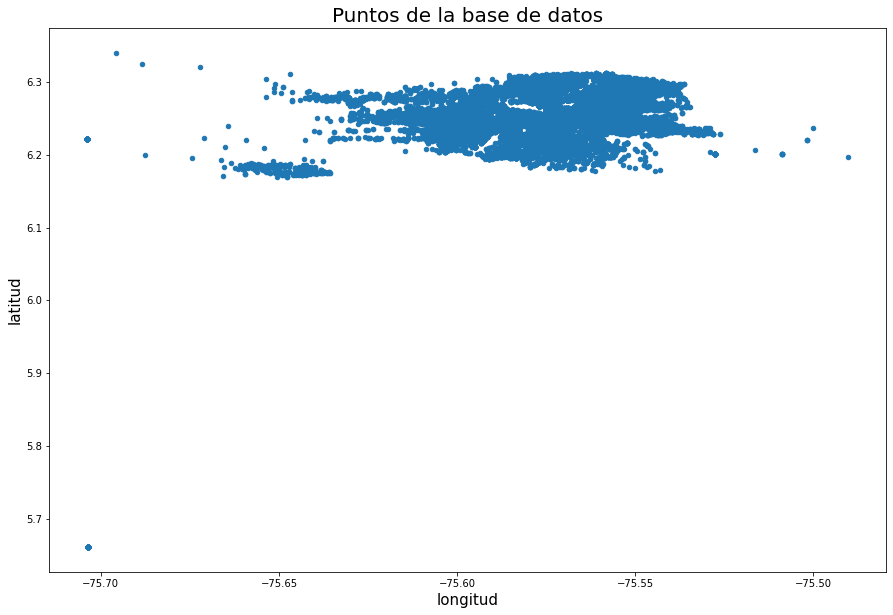

In [7]:
info.plot(kind="scatter", x="LONGITUD", y="LATITUD", figsize = (15,10))
plt.title("Puntos de la base de datos", fontsize = 20)
plt.ylabel("latitud", fontsize = 15)
plt.xlabel("longitud", fontsize = 15)

![picture](https://drive.google.com/uc?id=1fy6b9RXcjqr4SzM5LDAv-LmX-5YtgRJy)

De manera que se verifica que la información que se encuentra en estros datos debe ser descartada porque son errores en su creación. y se procede a eliminarlos

In [8]:
info.iloc[np.where(info["LATITUD"]==info["LATITUD"].min())[0].tolist()]

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
188,7,13,1,6,9,-75.703675,5.661296
200,5,9,1,4,10,-75.703675,5.661296
206,6,4,0,6,10,-75.703675,5.661296
241,2,29,0,1,9,-75.703675,5.661296
251,5,9,1,2,9,-75.703675,5.661296
...,...,...,...,...,...,...,...
25053,4,7,0,0,9,-75.703675,5.661296
25172,1,17,0,5,10,-75.703675,5.661296
25223,8,17,1,3,9,-75.703675,5.661296
25354,10,17,1,5,10,-75.703675,5.661296


Text(0.5, 0, 'longitud')

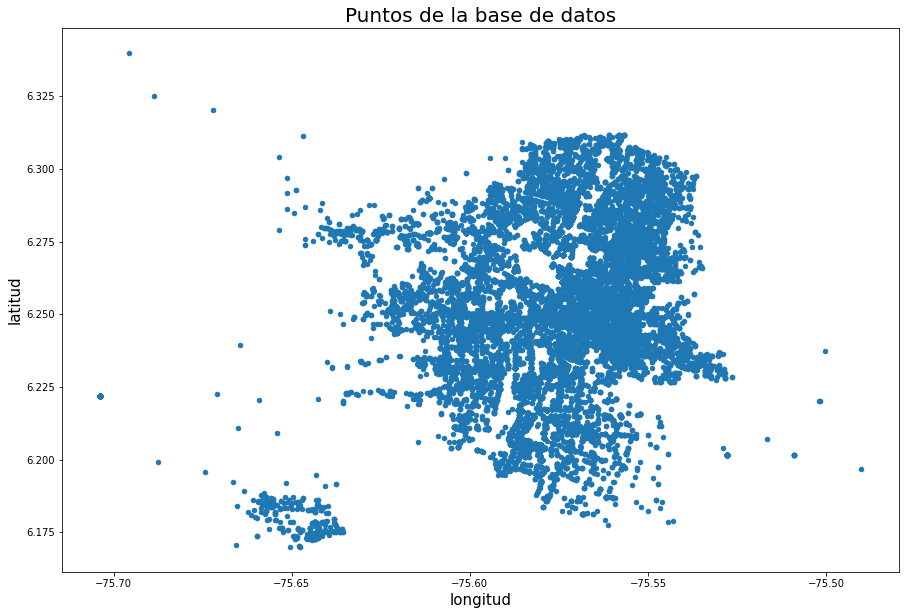

In [9]:
info = info.drop(np.where(info["LATITUD"]==info["LATITUD"].min())[0].tolist(), axis=0)
info.plot(kind="scatter", x="LONGITUD", y="LATITUD", figsize = (15,10))
plt.title("Puntos de la base de datos", fontsize = 20)
plt.ylabel("latitud", fontsize = 15)
plt.xlabel("longitud", fontsize = 15)

In [10]:
train_set, test_set = split_train_test(info, 0.2)

In [11]:
train_set

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
6378,3,27,1,1,10,-75.545935,6.294691
9309,8,11,1,1,2,-75.580270,6.273773
6766,5,1,0,5,2,-75.569971,6.231233
3261,7,15,0,2,7,-75.583441,6.289772
19516,6,10,0,4,1,-75.558688,6.247039
...,...,...,...,...,...,...,...
638,2,21,0,4,2,-75.580808,6.240133
2434,7,19,0,2,2,-75.590967,6.209577
23558,2,5,0,5,9,-75.557863,6.250970
11696,2,18,1,6,10,-75.600262,6.240803


In [12]:
info[187:190]

,HORA,DIA,GRAVEDAD,DIA_NOMBRE,MES,LONGITUD,LATITUD
187,12,4,0,5,1,-75.594908,6.262642
189,10,11,0,1,2,-75.566759,6.286774
190,8,23,1,2,9,-75.563876,6.307885
